# Rotation of a slice in the Fourier domain

**Sanity check**: Here we show more clearly what may seem confusing in ```Fourier_point_source.ipynb```. Note that we are interested in the rotation of the coordinates and the approximate locations of the initial points on the rotated grid, so we use the ```tab10``` color map to be able to track each point, and this is useful only with nearest neighbour interpolation. This doesn't tell us much when doing linear interpolation (since there is no link between the colours and the intermediate values).

In [1]:
import numpy as np
import jax.numpy as jnp
from matplotlib import pyplot as plt

from simplecryoem.forwardmodel import interpolate
from simplecryoem.forwardmodel.projection import rotate_z0

2024-10-11 00:24:15.241336: W external/xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.5 which is older than the PTX compiler version 12.6.77. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


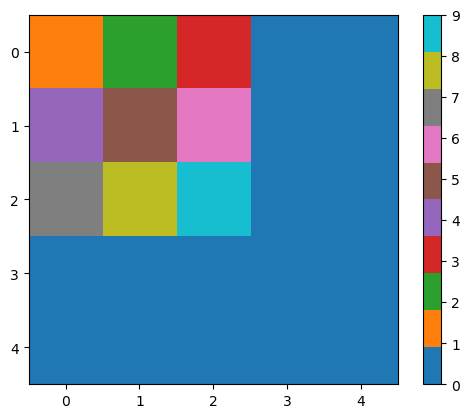

In [3]:
nx = 5
dx = 0.2

v = np.zeros([nx, nx, nx])
v[0:3, 0:3, 2] = np.arange(1, 10).reshape(3, 3)

plt.imshow(v[:, :, 2])
plt.colorbar()

plt.set_cmap("tab10")

In [4]:
x_freq = jnp.fft.fftfreq(nx, dx)
y_freq = jnp.fft.fftfreq(nx, dx)
z_freq = jnp.fft.fftfreq(nx, dx)

x_grid = jnp.array([x_freq[1], len(x_freq)])
y_grid = jnp.array([y_freq[1], len(y_freq)])
z_grid = jnp.array([z_freq[1], len(z_freq)])

In [5]:
angles = jnp.array([0, 0, jnp.pi / 4])
slice_coords = rotate_z0(x_grid, angles)

In [6]:
Xr = slice_coords[0, :].reshape(nx, nx)
Yr = slice_coords[1, :].reshape(nx, nx)

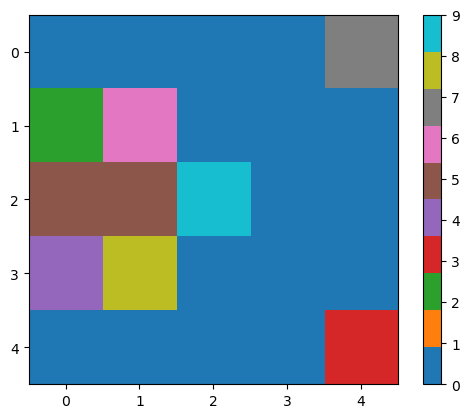

In [7]:
slice_interp = interpolate(slice_coords, x_grid, jnp.fft.ifftshift(v), "nn")
slice_interp_2d = jnp.fft.fftshift(slice_interp.reshape(v.shape[0], v.shape[1]))
plt.imshow(slice_interp_2d)
plt.colorbar()